# Heart Failure Prediction Model

Heart failure clinical recoreds dataset을 이용해 심부전증으로 인한 사망 여부를 예측하는 모델을 만듭니다.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def get_bins(start, end, step, hist=False):
    return (end - start) // step + (0 if hist else 1)


def plot_bar_distribution(disease, column_name):
    sns.barplot(df[column_name].value_counts())
    plt.title(f"{disease} 분포")
    plt.xticks([0, 1], ["정상", disease])
    plt.xlabel(f"{disease} 소견")
    plt.ylabel("사람 수(명)")
    plt.show()
    print(df[column_name].value_counts())


def plot_bar_death_rate(disease, column_name, end, step):
    start = 0
    sns.barplot(x=column_name, y="DEATH_EVENT", data=df, errorbar=None)
    plt.title(f"{disease}에 따른 심부전증 사망률")
    plt.xticks([0, 1], ["정상", disease])
    bins = get_bins(start, end, step)
    plt.yticks(np.linspace(0, end / 100, bins), np.arange(start, end + 1, step))
    plt.xlabel(f"{disease} 소견")
    plt.ylabel("사망률(%)")
    plt.show()


def plot_hist_distribution(stat, column_name, start, end, step):
    bins = get_bins(start, end, step, True)
    sns.histplot(df[column_name], bins=bins, binrange=[start, end])
    plt.title(f"{stat} 분포")
    plt.xlabel(stat)
    plt.ylabel("사람 수(명)")
    plt.show()


def plot_avg_mortality(stat, column_name, step):
    new_column = f"{column_name}_bin"
    df[new_column] = np.floor_divide(df[column_name], step) * step
    df_grouped = df.groupby(new_column)["DEATH_EVENT"].mean().reset_index()
    sns.lineplot(x=new_column, y="DEATH_EVENT", data=df_grouped)
    plt.title(f"{stat} 수치별 평균 사망률")
    plt.xlabel(stat)
    start, end, step = 0, 100, 20
    bins = get_bins(start, end, step)
    plt.yticks(np.linspace(0, 1, bins), labels=np.arange(start, end + 1, step))
    plt.ylabel("평균 사망률(%)")
    plt.show()


plt.rc("font", family="Malgun Gothic")

path = "data/heart_failure_clinical_records_dataset.csv"
df = pd.read_csv(path, encoding="utf-8")

## EDA

데이터를 분석하기 전에 데이터의 특징을 시각화하고 이해하는 과정입니다.
아래의 순서대로 진행됩니다.

1. 데이터의 기본 정보 확인
   - df.info(), df.describe(), df.head()
   - 결측치(누락된 값) 확인: df.isnull().sum()
2. 데이터 분포 파악
   - 히스토그램(sns.histplot())
   - 박스플롯(sns.boxplot())
3. 데이터 관계 확인
   - 상관계수(df.corr(), sns.heatmap())
4. 이상치 탐색
   - 이상하게 튀는 값 있는지 체크


### 기본 정보

- age: 환자의 나이
- anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)
- creatinine_phosphokinase: 크레아틴키나제 검사 결과
- diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)
- ejection_fraction: 박출계수 (%)
- high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)
- platelets: 혈소판 수 (kiloplatelets/mL)
- serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)
- serum_sodium: 혈중 나트륨 레벨 (mEq/L)
- sex: 성별 (0: 여성, 1: 남성)
- smoking: 흡연 여부 (0: 비흡연, 1: 흡연)
- time: 관찰 기간 (일)
- DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)

데이터 출처: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [3]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


c:\Users\ssair\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
c:\Users\ssair\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


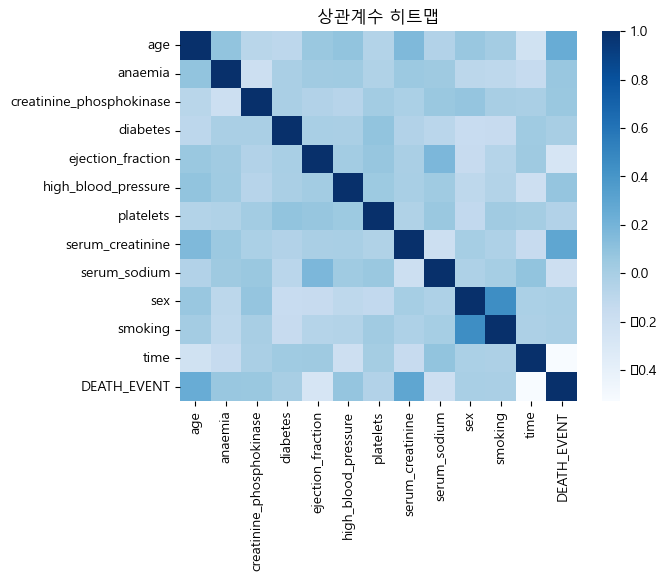

In [5]:
sns.heatmap(df.corr(), cmap="Blues")
plt.title("상관계수 히트맵")
plt.show()

### 나이

- 60대가 가장 많고, 50대, 40대, 70대, 80대, 90대 순서로 많습니다.
- 연령과 사망률은 비례하는 경향이 있습니다.


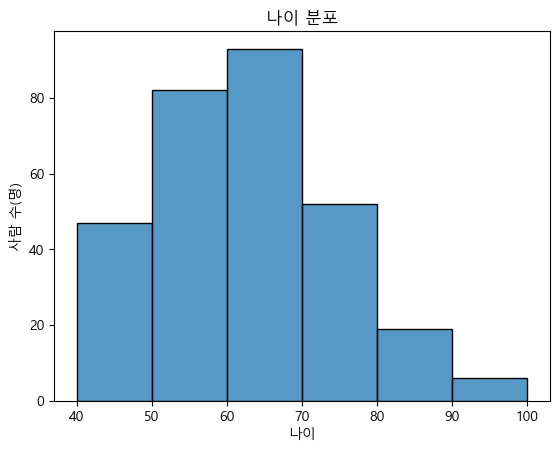

In [6]:
plot_hist_distribution("나이", "age", 40, 100, 10)

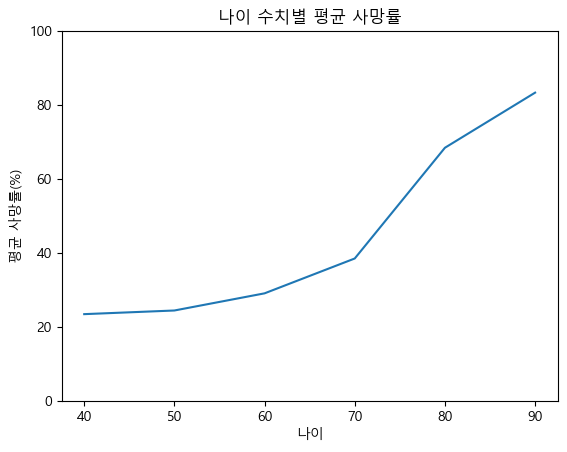

In [7]:
plot_avg_mortality("나이", "age", 10)

### 빈혈

- 정상소견이 170명, 빈혈소견이 129명입니다.
- 빈혈이 있는 그룹이 빈혈이 없는 그룹보다 사망률이 5% 정도 더 높습니다.


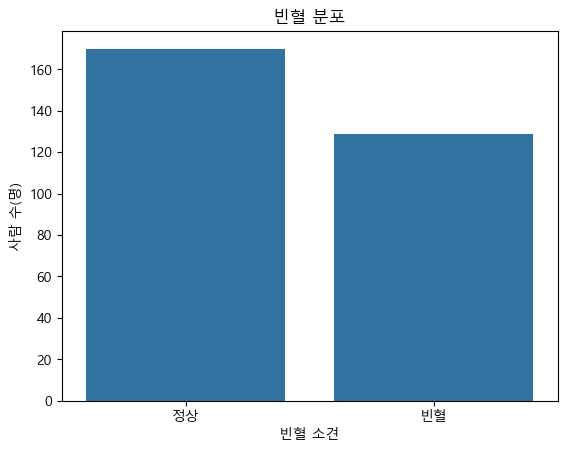

anaemia
0    170
1    129
Name: count, dtype: int64


In [8]:
plot_bar_distribution("빈혈", "anaemia")

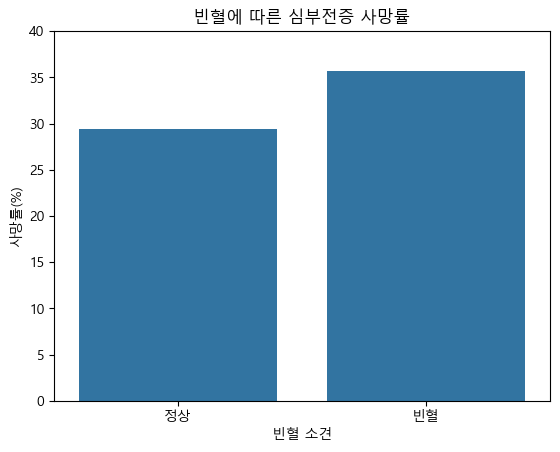

In [9]:
plot_bar_death_rate("빈혈", "anaemia", 40, 5)

### 크레아틴키나제 검사 결과

- 크레아틴키나제는 근육 손상이나 심장 질환을 평가하는 효소입니다.
- 200 이상이면 높은 편이고, 1000 이상이면 근육 손상 가능성이 있습니다. 5000 ~ 10000 이상이라면 횡문근융해증 가능성이 있습니다.
- 심부전 환자의 경우 CPK가 높을수록 예후가 나빠질 가능성이 있기 때문에 이상치 제거를 하면 중요한 패턴을 놓칠 수 있습니다.
- 사분위 방법이 아닌, 로그 변환 같은 방법을 고려하는게 좋습니다.


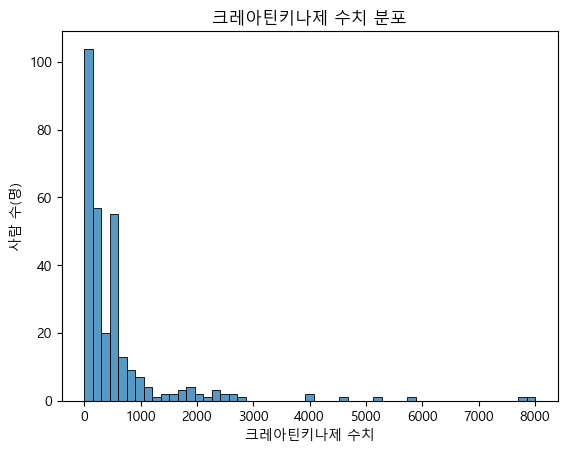

In [10]:
plot_hist_distribution("크레아틴키나제 수치", "creatinine_phosphokinase", 0, 8000, 150)

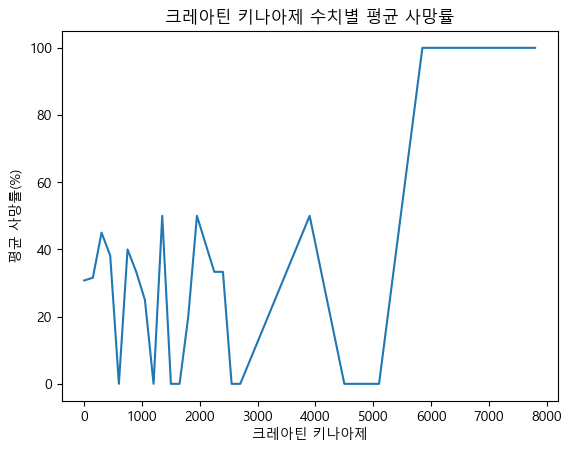

In [11]:
plot_avg_mortality("크레아틴 키나아제", "creatinine_phosphokinase", 150)

### 당뇨

- 정상소견이 174명, 당뇨소견이 125명입니다.
- 당뇨 환자와 정상인의 심부전증 사망률을 살펴보면 정상인의 사망률이 당뇨 환자보다 약간 높습니다.
- 그러나 그 차이는 1% 이내로 매우 미미하여, 당뇨가 심부전 사망률에 미치는 영향은 크지 않은 것으로 보입니다.


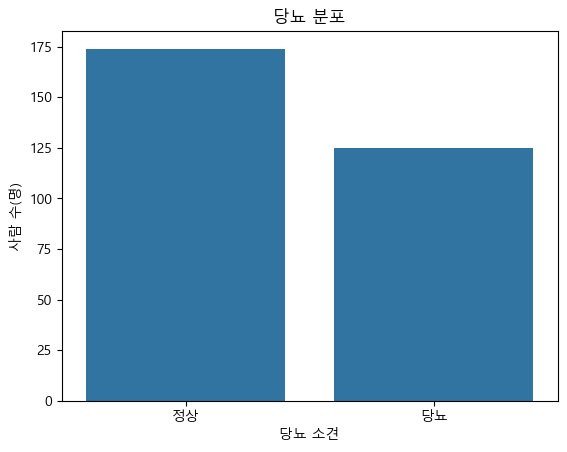

diabetes
0    174
1    125
Name: count, dtype: int64


In [12]:
plot_bar_distribution("당뇨", "diabetes")

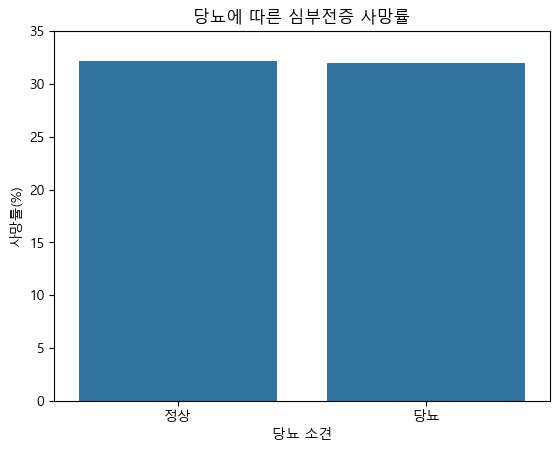

In [13]:
plot_bar_death_rate("당뇨", "diabetes", 35, 5)

### 박출계수

- 박출계수는 심장이 한 번 수축할 때, 좌심실이 내보내는 혈액의 비율을 의미합니다.
- 즉, 심장이 얼마나 효율적으로 혈액을 펌프질하는지 나타내는 중요한 지표입니다.
- 박출계수의 정상 범위는 55~70%이며, 박출계수가 낮을수록 혈액을 효과적으로 내보내지 못합니다.
- 박출계수가 낮을수록 사망률이 증가하는 경향을 보이며, 70 구간에서 사망률이 100%가 되는것은 이상치 인것으로 보입니다.
- 이상치는 제거하거나, 60과 80의 평균치로 값을 수정합니다.


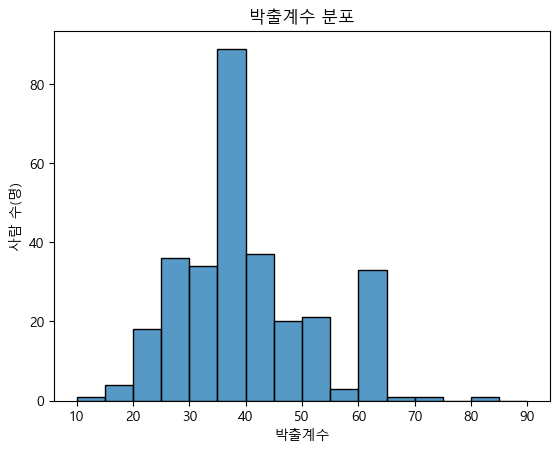

In [14]:
plot_hist_distribution("박출계수", "ejection_fraction", 10, 90, 5)

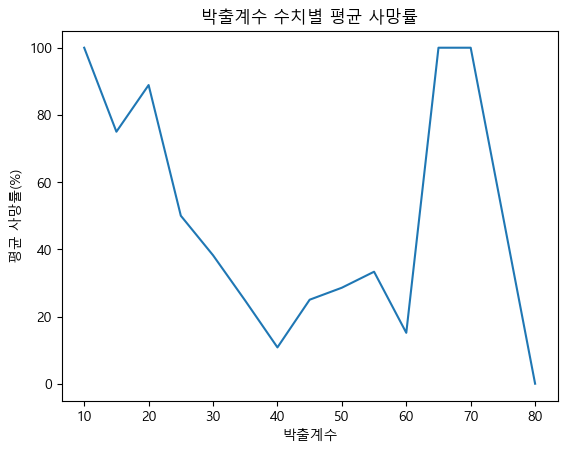

In [15]:
plot_avg_mortality("박출계수", "ejection_fraction", 5)

### 고혈압

- 정상소견이 194명, 고혈압소견이 105명입니다.
- 고혈압 환자는 정상인보다 사망률이 5% 높습니다.


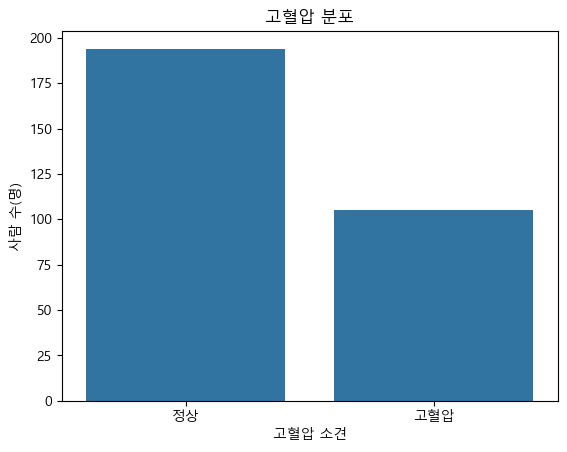

high_blood_pressure
0    194
1    105
Name: count, dtype: int64


In [16]:
plot_bar_distribution("고혈압", "high_blood_pressure")

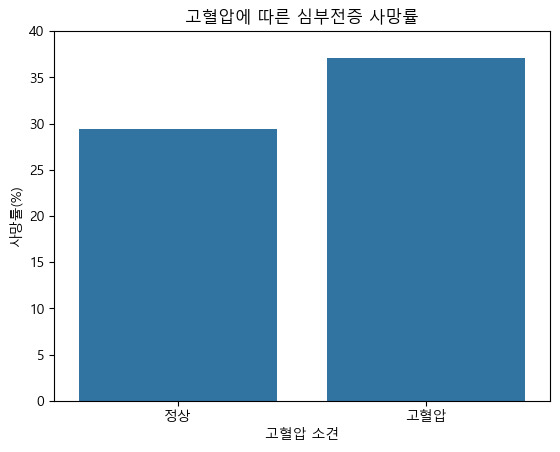

In [17]:
plot_bar_death_rate("고혈압", "high_blood_pressure", 40, 5)

### 혈소판 수

- 150000~400000 사이의 분포가 많고, 나머지는 희박합니다.
- 혈소판이 너무 적으면 출혈 위험이 증가하고, 너무 많으면 혈전(피떡) 위험이 증가합니다.
- 사망 여부와 혈소판 수의 관계를 박스플롯으로 분석하면 의미있는 패턴을 찾을 수 있습니다.
- 사분위수로 이상치를 확인한 후, 이상치를 제거 혹은 보정합니다.


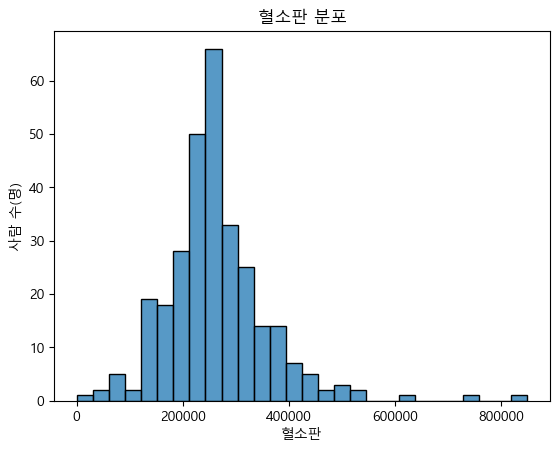

In [18]:
plot_hist_distribution("혈소판", "platelets", 0, 850000, 30000)

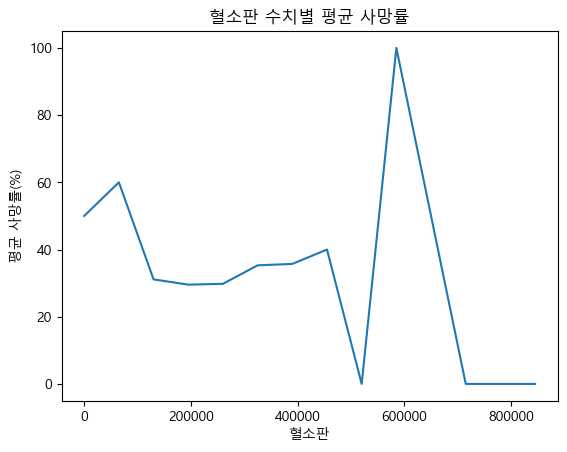

In [19]:
plot_avg_mortality("혈소판", "platelets", 65000)

### 혈중 크레아틴

- 혈중 크레아틴이 높을수록 사망률이 증가하는 경향을 보임
- 4에서 너무 높아지는것은 이상치로 판단, 3과 5의 평균으로 바꿉니다.


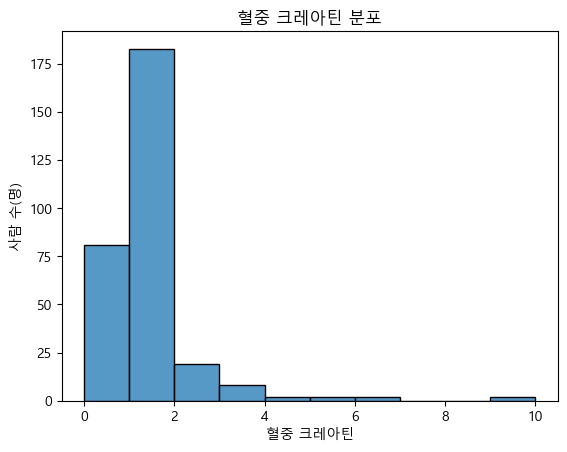

In [20]:
plot_hist_distribution("혈중 크레아틴", "serum_creatinine", 0, 10, 1)

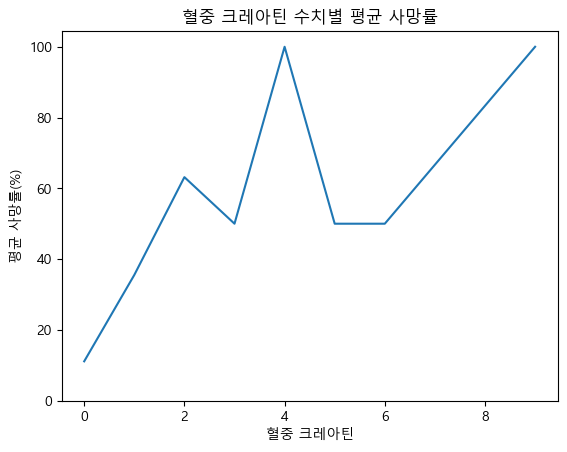

In [21]:
plot_avg_mortality("혈중 크레아틴", "serum_creatinine", 1)

### 혈중 나트륨

- 체액 균형과 혈압 조절, 신경 및 근육 기능에 중요한 역할을 하는 전해질입니다.
- 심부전 환자의 경우 혈중 나트륨 수치가 낮으면 사망 위험이 높아질 가능성이 있습니다.


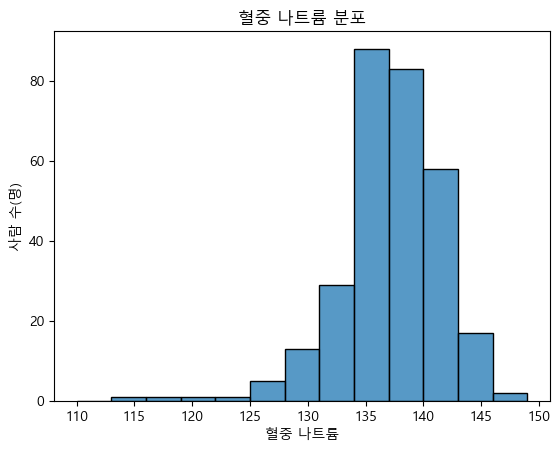

In [22]:
plot_hist_distribution("혈중 나트륨", "serum_sodium", 110, 149, 3)

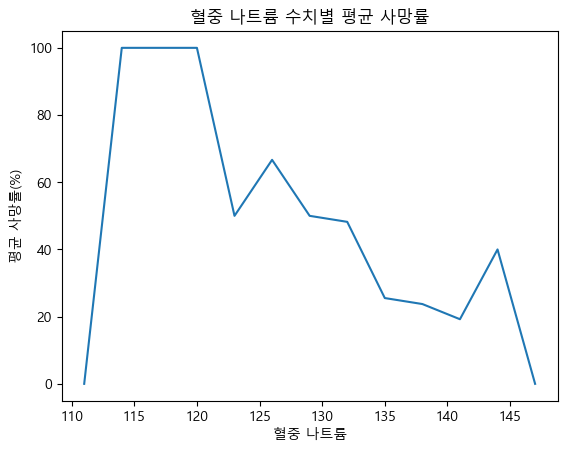

In [23]:
plot_avg_mortality("혈중 나트륨", "serum_sodium", 3)

### 성별

- 성별의 경우 여성이 105명, 남성이 194명입니다.
- 성별에 따른 사망률의 차이는 미미하거나 존재하지 않는 것으로 보입니다.


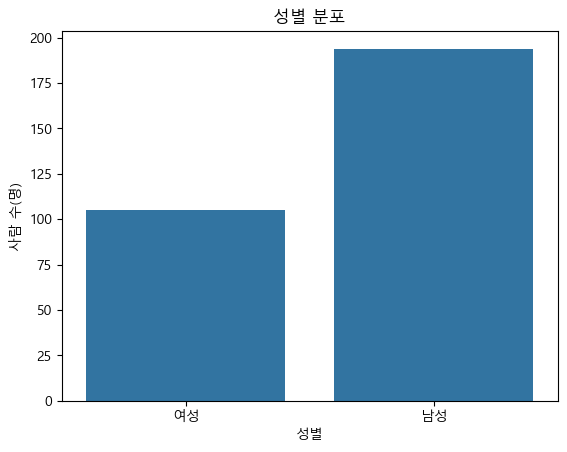

sex
1    194
0    105
Name: count, dtype: int64

In [24]:
sns.barplot(df["sex"].value_counts())
plt.title("성별 분포")
plt.xticks([0, 1], ["여성", "남성"])
plt.xlabel("성별")
plt.ylabel("사람 수(명)")
plt.show()
df["sex"].value_counts()

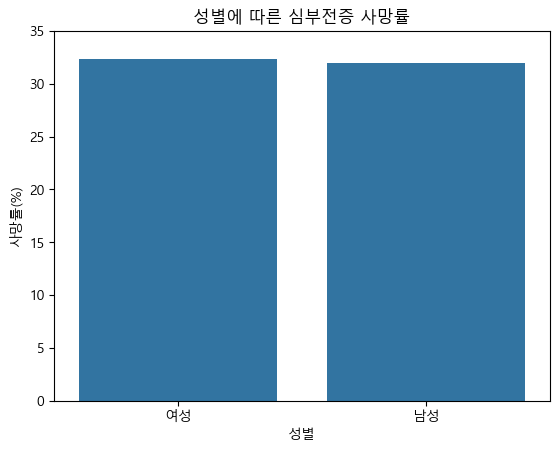

In [25]:
start, end, step = 0, 35, 5
sns.barplot(x="sex", y="DEATH_EVENT", data=df, errorbar=None)
plt.title(f"성별에 따른 심부전증 사망률")
plt.xticks([0, 1], ["여성", "남성"])
bins = get_bins(start, end, step)
plt.yticks(np.linspace(0, end / 100, bins), np.arange(start, end + 1, step))
plt.xlabel("성별")
plt.ylabel("사망률(%)")
plt.show()

### 흡연

- 비흡연자 203명, 흡연자 96명입니다.
- 흡연 여부에 따른 심부전증 사망률은 비흡연자가 2퍼센트 더 높게 나왔습니다.
- 흡연과 심부전증의 상관 관계는 미미하거나, 존재하지 않습니다.


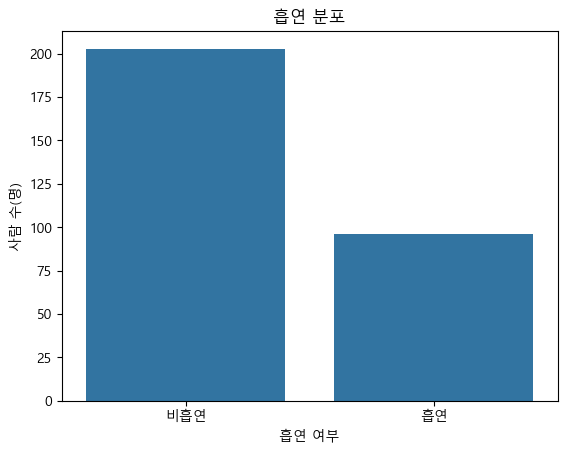

smoking
0    203
1     96
Name: count, dtype: int64

In [26]:
sns.barplot(df["smoking"].value_counts())
plt.title("흡연 분포")
plt.xticks([0, 1], ["비흡연", "흡연"])
plt.xlabel("흡연 여부")
plt.ylabel("사람 수(명)")
plt.show()
df["smoking"].value_counts()

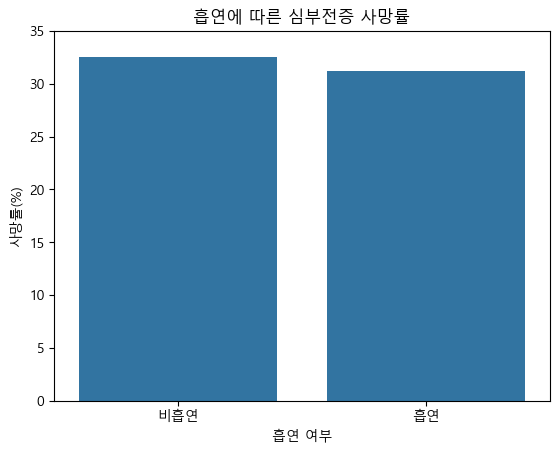

In [27]:
start, end, step = 0, 35, 5
sns.barplot(x="smoking", y="DEATH_EVENT", data=df, errorbar=None)
plt.title(f"흡연에 따른 심부전증 사망률")
plt.xticks([0, 1], ["비흡연", "흡연"])
bins = get_bins(start, end, step)
plt.yticks(np.linspace(0, end / 100, bins), np.arange(start, end + 1, step))
plt.xlabel("흡연 여부")
plt.ylabel("사망률(%)")
plt.show()

### 시간

- 해당 데이터의 관찰 기간입니다.
- 관찰 기간이 길어질수록 사망률이 낮아지는 경향을 보였지만,  
  이는 시간 자체가 사망률 감소의 직접적인 원인이라고 단정하기는 어렵습니다.
- 환자의 치료 과정, 건강 상태, 초기 병증의 심각도 등 여러 요인이 영향을 미칠 수 있으므로,  
  추가적인 요인 분석이 필요합니다.


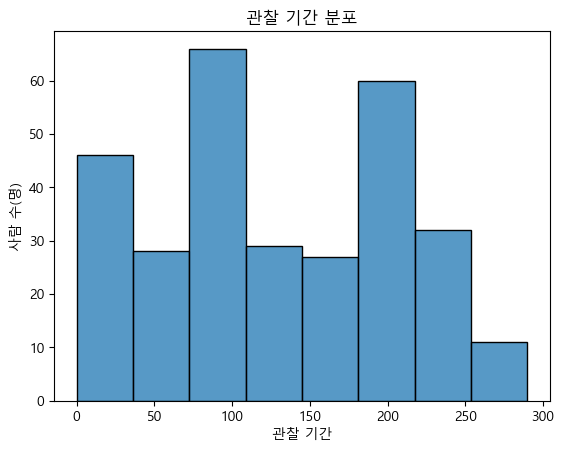

In [28]:
plot_hist_distribution("관찰 기간", "time", 0, 290, 35)

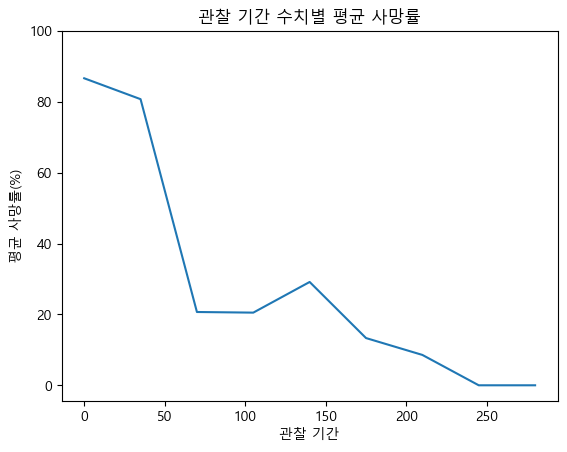

In [29]:
plot_avg_mortality("관찰 기간", "time", 35)